In [1]:
# Step 1: Import necessary libraries

import pandas as pd               # For data handling (like Excel)
import numpy as np                # For numbers and calculations
import matplotlib.pyplot as plt   # For charts
import seaborn as sns             # For beautiful plots

# Just to make sure we don't see annoying warnings
import warnings
warnings.filterwarnings('ignore')

# To make charts look clean and consistent
sns.set(style='whitegrid')


In [2]:
# Step 2: Load the heart disease dataset

df = pd.read_csv("../data/heart.csv")   # Load the CSV file
df.head()                               # Show the first 5 rows


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
# Step 3: Basic information about the dataset

print("Shape of dataset:", df.shape)         # Rows and columns
print("\nColumn Info:")
df.info()                                    # Data types, nulls, memory

print("\nMissing values:")
print(df.isnull().sum())                     # Check for any missing values


Shape of dataset: (1025, 14)

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB

Missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca

In [4]:
# Step 4: Check for duplicates

print("Number of duplicate rows:", df.duplicated().sum())

# If there are duplicates, remove them
df = df.drop_duplicates()

# New shape
print("New shape after removing duplicates:", df.shape)


Number of duplicate rows: 723
New shape after removing duplicates: (302, 14)


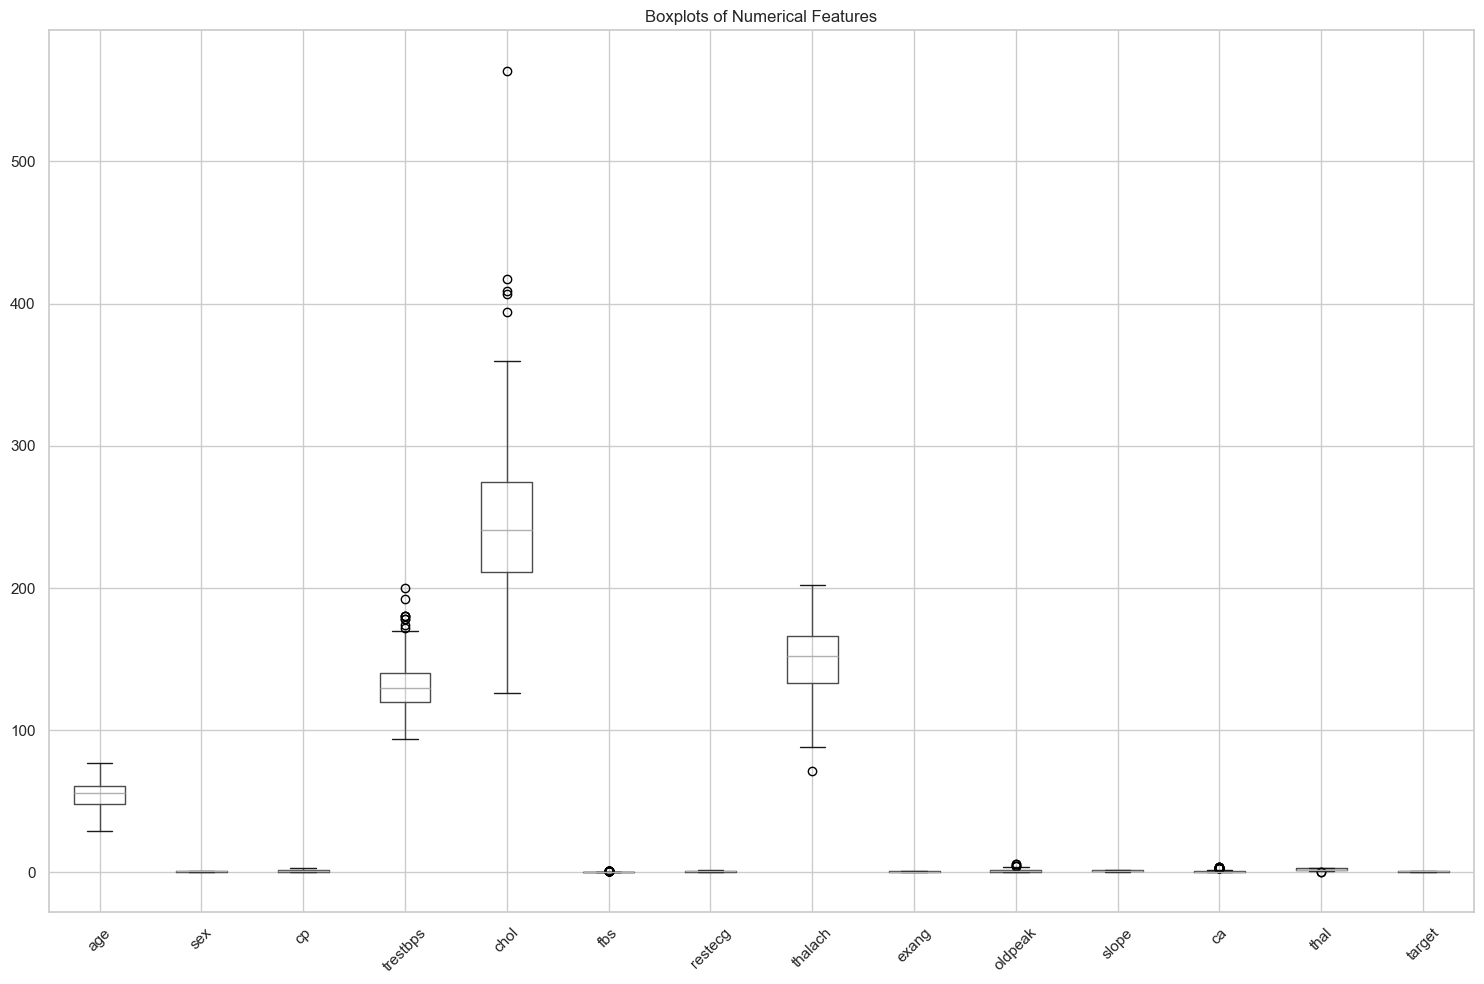

In [5]:
# Step 5: Boxplots for each numerical column to check for outliers

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
df.boxplot()
plt.title("Boxplots of Numerical Features")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


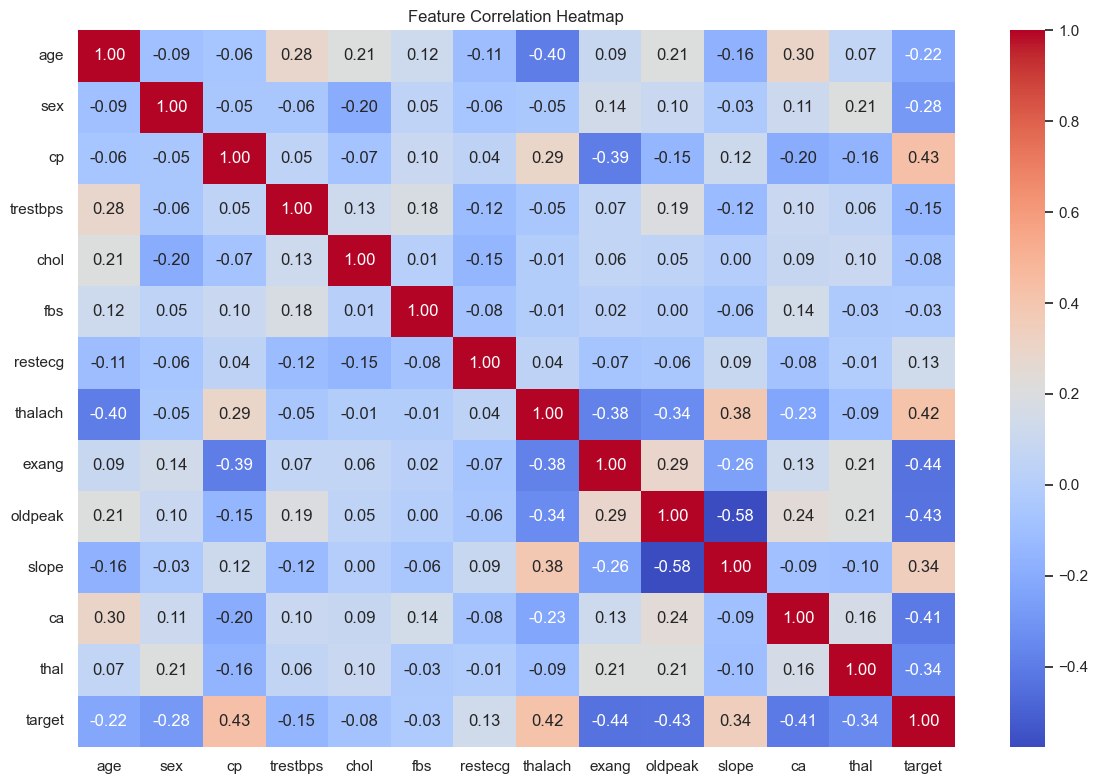

In [6]:
# Step 6: Correlation Heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()


In [7]:
# Step 7: Split data into features (X) and target (y)

X = df.drop('target', axis=1)  # All columns except target
y = df['target']               # Only the target column

# Now split into train/test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42  # 80% train, 20% test
)

# Print shapes to confirm
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Training data shape: (241, 13)
Test data shape: (61, 13)


In [8]:
# Step 8: Train a Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on test set
y_pred = dt_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy on Test Data:", round(accuracy * 100, 2), "%")


Decision Tree Accuracy on Test Data: 73.77 %


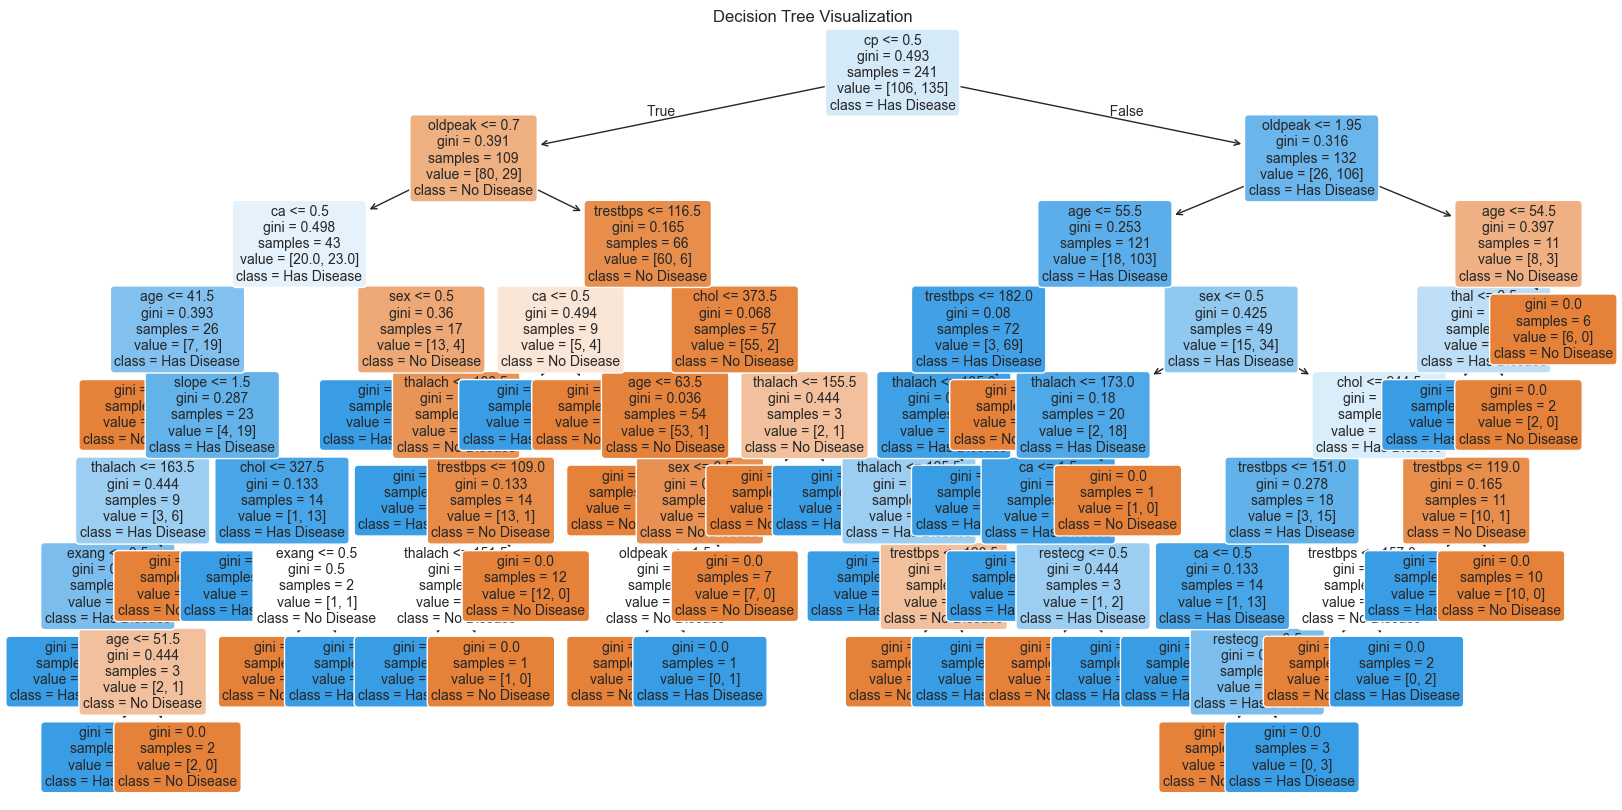

In [9]:
# Step 9: Visualize the decision tree

from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=["No Disease", "Has Disease"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()


In [10]:
# Step 10: Train a pruned (simpler) decision tree with max depth

dt_pruned = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_pruned.fit(X_train, y_train)

# Predict again
y_pred_pruned = dt_pruned.predict(X_test)

# Accuracy
pruned_accuracy = accuracy_score(y_test, y_pred_pruned)
print("Pruned Decision Tree Accuracy:", round(pruned_accuracy * 100, 2), "%")


Pruned Decision Tree Accuracy: 73.77 %


In [11]:
# Step 11: Train a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# Create the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print("Random Forest Accuracy on Test Data:", round(rf_accuracy * 100, 2), "%")


Random Forest Accuracy on Test Data: 83.61 %


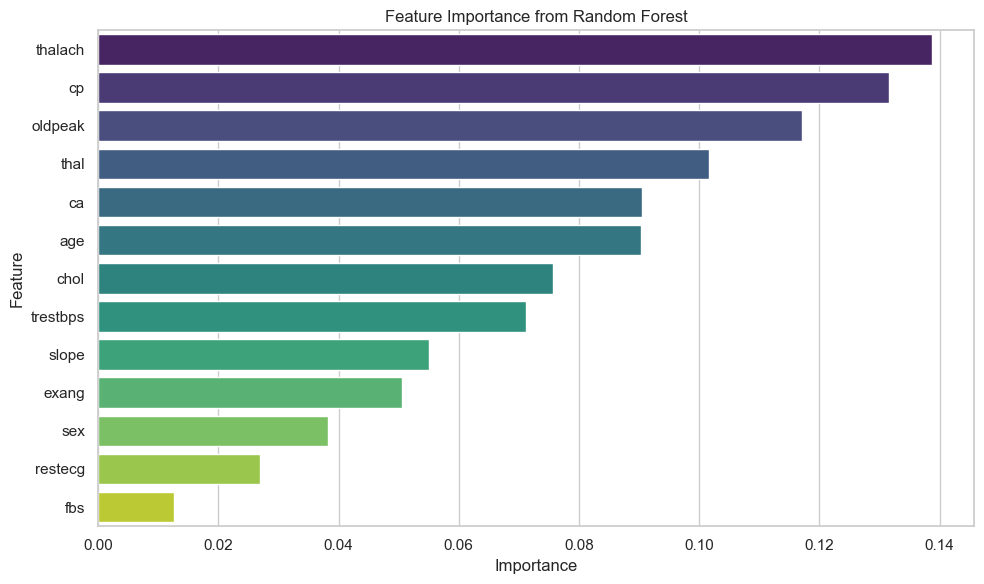

In [12]:
# Step 12: Plot feature importances

importances = rf_model.feature_importances_
features = X.columns

# Create a DataFrame for easy sorting and plotting
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_df, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance from Random Forest")
plt.tight_layout()
plt.show()


In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Use the cleaned data
X = df.drop("target", axis=1)
y = df["target"]

# Decision Tree Cross-Validation (5-fold)
dt_model = DecisionTreeClassifier(random_state=42)
dt_scores = cross_val_score(dt_model, X, y, cv=5)
print("Decision Tree CV Accuracy: ", dt_scores.mean())

# Random Forest Cross-Validation (5-fold)
rf_model = RandomForestClassifier(random_state=42)
rf_scores = cross_val_score(rf_model, X, y, cv=5)
print("Random Forest CV Accuracy: ", rf_scores.mean())


Decision Tree CV Accuracy:  0.7747540983606557
Random Forest CV Accuracy:  0.8278142076502732
